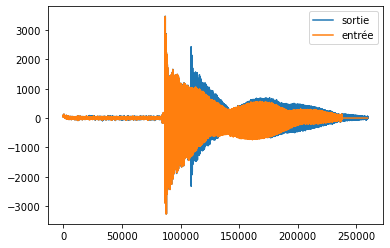

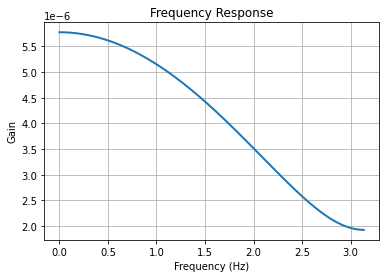

In [166]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import math
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
# D Delay Time
echo_duration=0.5
# alpha Amplification factor
delay_amplitude=0.5
# read file
fs, data_int16 = wavfile.read("string_1.wav")
data=data_int16.astype(np.float)
#creating samples
delay_samples=round(echo_duration * fs)
# The idea is to create an empty signal with the final dimensions(the delay is being taken into consideration)
# then do the addition of e(t) and the delayed signal
zero=np.zeros(delay_samples)

delayed_sig= np.concatenate((zero, data))
data=np.concatenate((data, zero))

x=data
sum_sig= data + delay_amplitude*delayed_sig


wavfile.write("new.wav", fs, sum_sig)
plt.figure()
plt.plot(sum_sig,label='sortie')
plt.plot(x, label='entrée')
plt.legend();
#frequency
w, h = freqz((1.0, 0.5), x.size)
plt.figure()           
plt.plot(w, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
grid(True)





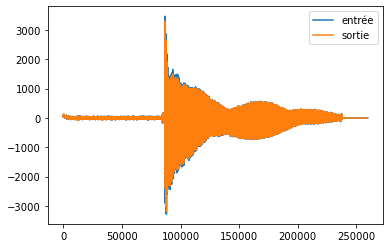

In [164]:
s=0.5*x[:1]
s1=list(s)
# alpha = 0.5, beta = 0.5

for t in range(len(x)-1):
    s1.append(0.5*x[t+1]+0.5*s1[t]) 
plt.figure()
plt.plot(x, label='entrée')
plt.plot(s1,label='sortie')
plt.legend();